<a href="https://colab.research.google.com/github/OliviaIntan/IPSD-Assignment/blob/main/Tugas%205/Guided.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
gfrom google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ASPRAK/IPSD/Modul 5/data.csv')
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave_points_mean,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop(columns='id', inplace=True)

In [ ]:
!pip show matplotlib

Name: matplotlib
Version: 3.8.0
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /usr/local/lib/python3.10/dist-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: arviz, bigframes, datascience, fastai, geemap, imgaug, matplotlib-venn, missingno, mlxtend, music21, plotnine, prophet, pycocotools, seaborn, wordcloud, yellowbrick


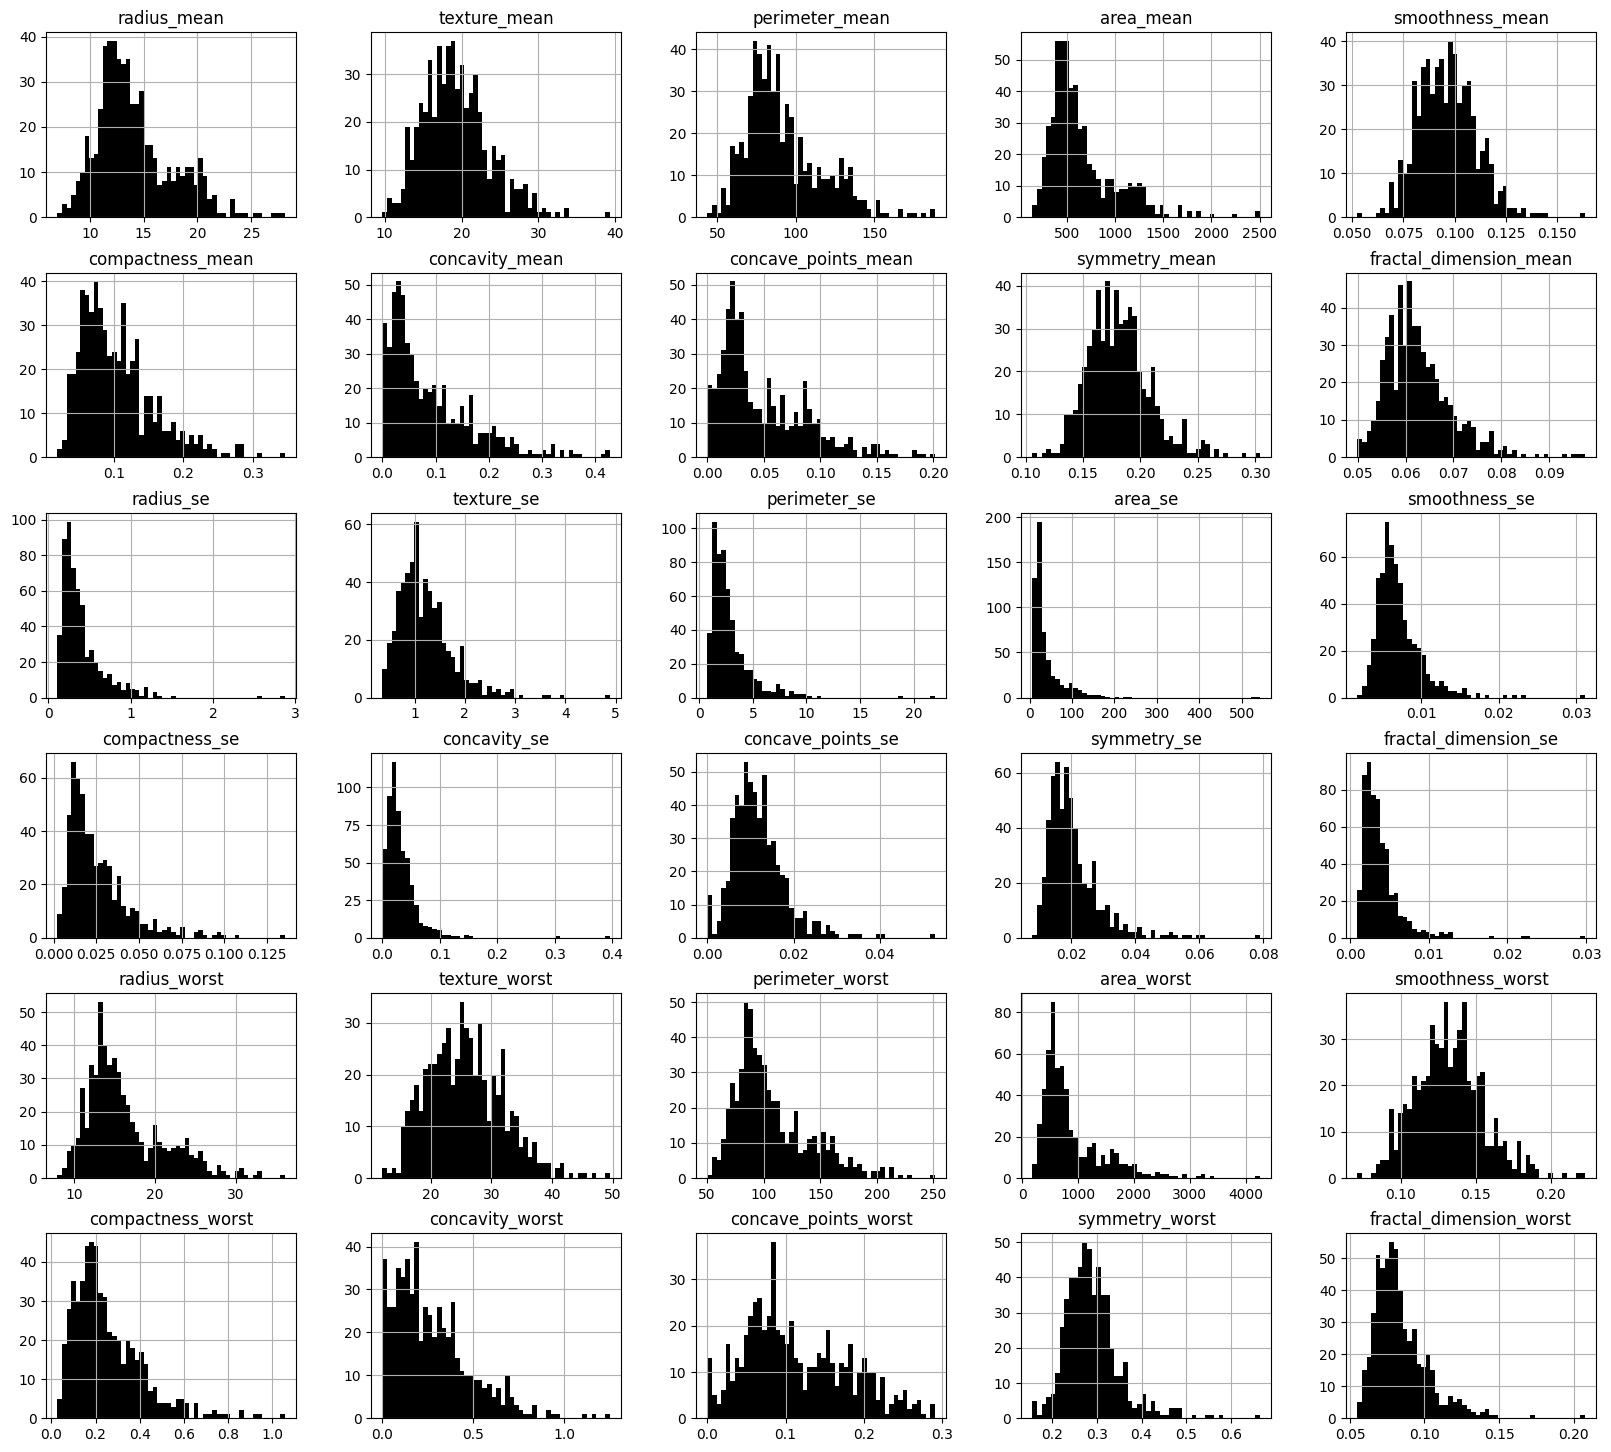

In [ ]:
df.hist(bins=50, figsize=(20, 18), color='black');

In [ ]:
#df_baru = []
def outlier(data):
    columns = df.select_dtypes(include=['int', 'float']).columns
    outlier_counts = {}
    for x in columns:
        Q1 = data[x].quantile(0.25)
        Q3 = data[x].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 -1.5*IQR
        upper_bound = Q3+1.5*IQR
        outliers = data[(data[x] < lower_bound) | (data[x] > upper_bound)]
        outlier_counts[x] = len(outliers)

    return outlier_counts

outlier_counts = outlier(df)
print(f'jumlah data oulier : {outlier_counts}')

jumlah data oulier : {'radius_mean': 14, 'texture_mean': 7, 'perimeter_mean': 13, 'area_mean': 25, 'smoothness_mean': 6, 'compactness_mean': 16, 'concavity_mean': 18, 'concave_points_mean': 10, 'symmetry_mean': 15, 'fractal_dimension_mean': 15, 'radius_se': 38, 'texture_se': 20, 'perimeter_se': 38, 'area_se': 65, 'smoothness_se': 30, 'compactness_se': 28, 'concavity_se': 22, 'concave_points_se': 19, 'symmetry_se': 27, 'fractal_dimension_se': 28, 'radius_worst': 17, 'texture_worst': 5, 'perimeter_worst': 15, 'area_worst': 35, 'smoothness_worst': 7, 'compactness_worst': 16, 'concavity_worst': 12, 'concave_points_worst': 0, 'symmetry_worst': 23, 'fractal_dimension_worst': 24}


In [ ]:
def remove_outlier(data):
    columns = data.select_dtypes(include=['int', 'float']).columns
    cleaned_data = data.copy()  # Membuat salinan DataFrame untuk menghindari perubahan pada data asli
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) &
         (cleaned_data[column] <= upper_bound)]
    return cleaned_data

df_cleaned = remove_outlier(df)

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 6 to 566
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                398 non-null    object 
 1   radius_mean              398 non-null    float64
 2   texture_mean             398 non-null    float64
 3   perimeter_mean           398 non-null    float64
 4   area_mean                398 non-null    float64
 5   smoothness_mean          398 non-null    float64
 6   compactness_mean         398 non-null    float64
 7   concavity_mean           398 non-null    float64
 8   concave_points_mean      398 non-null    float64
 9   symmetry_mean            398 non-null    float64
 10  fractal_dimension_mean   398 non-null    float64
 11  radius_se                398 non-null    float64
 12  texture_se               398 non-null    float64
 13  perimeter_se             398 non-null    float64
 14  area_se                  398 no

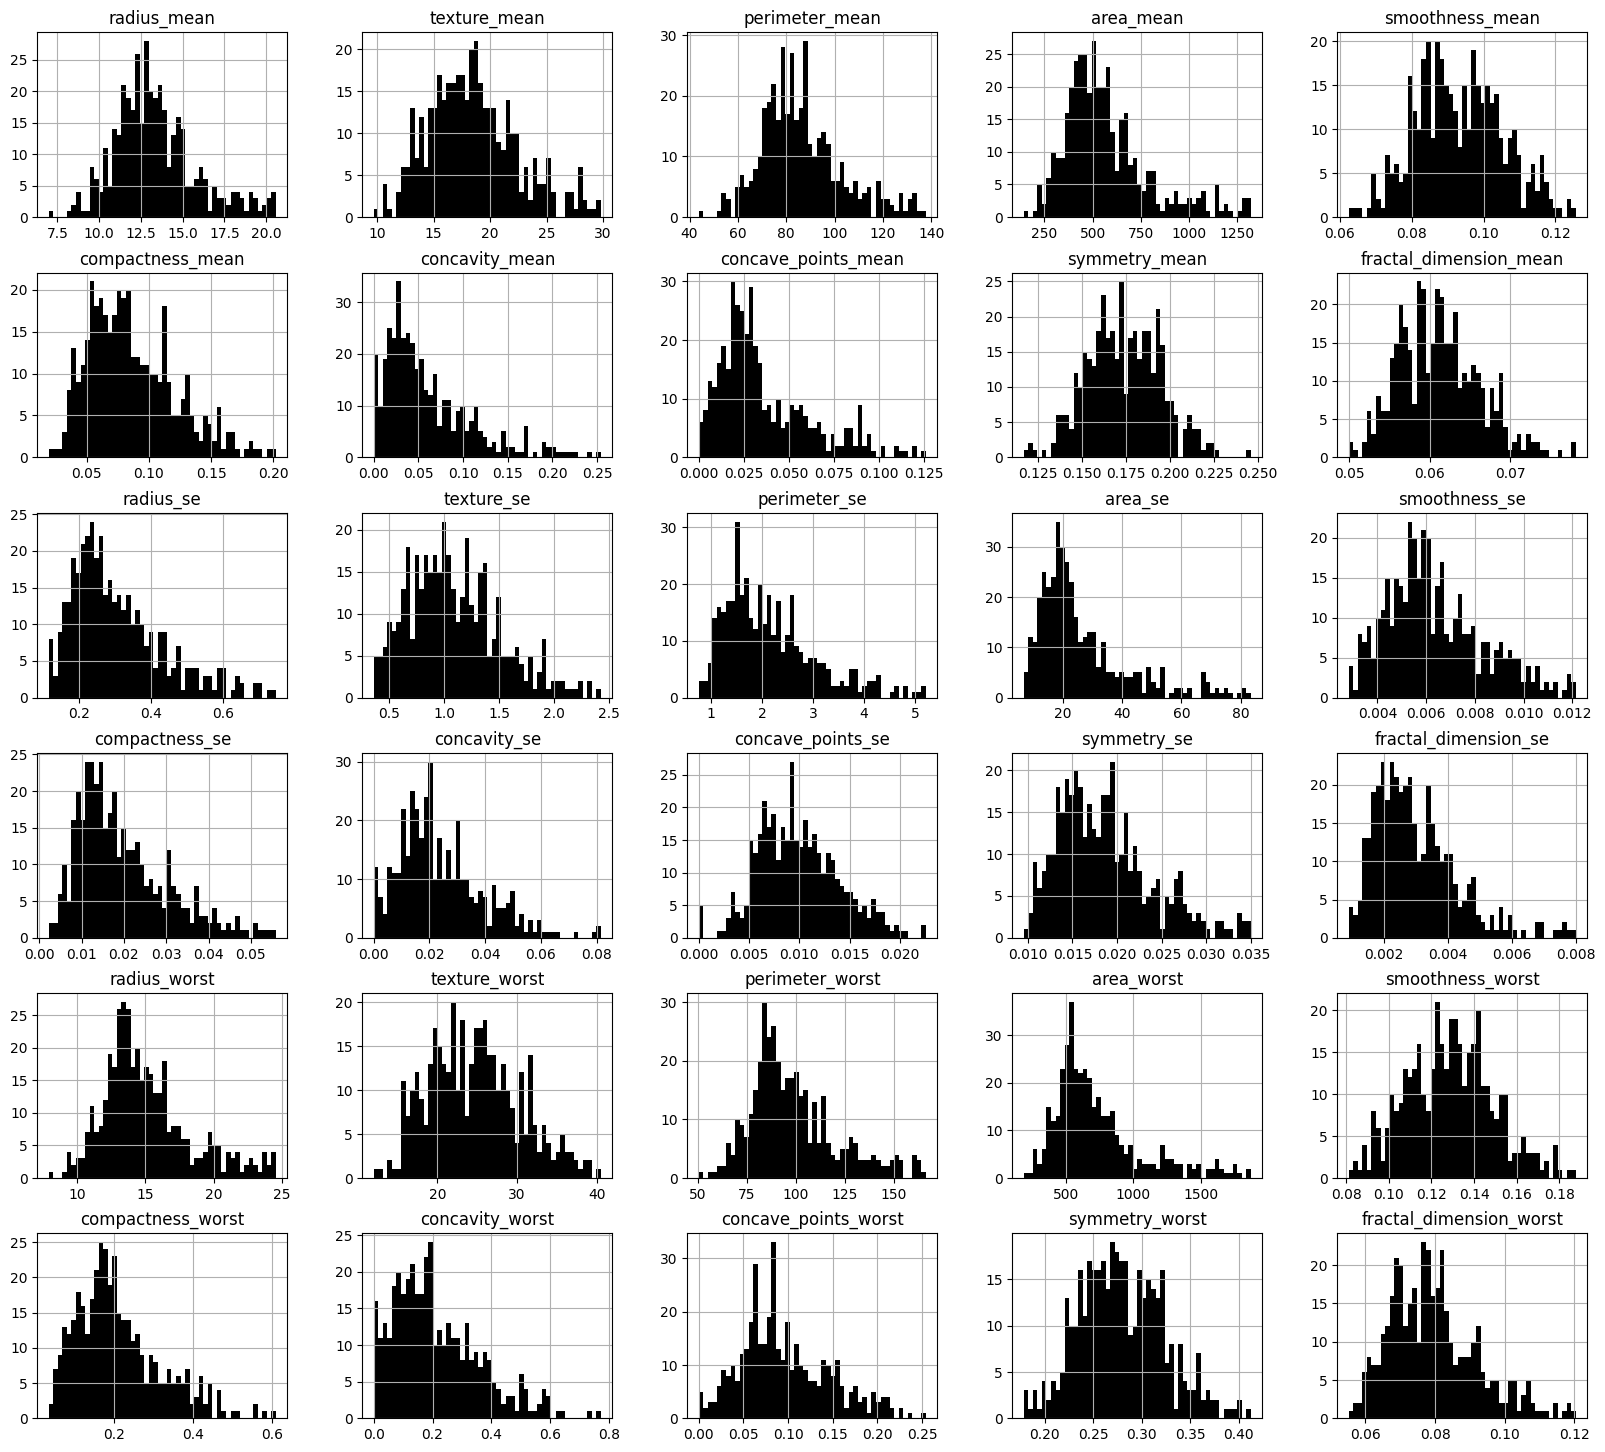

In [ ]:
df_cleaned.hist(bins=50, figsize=(20, 18), color='black');

<Axes: title={'center': 'Correlation Between Variables'}>

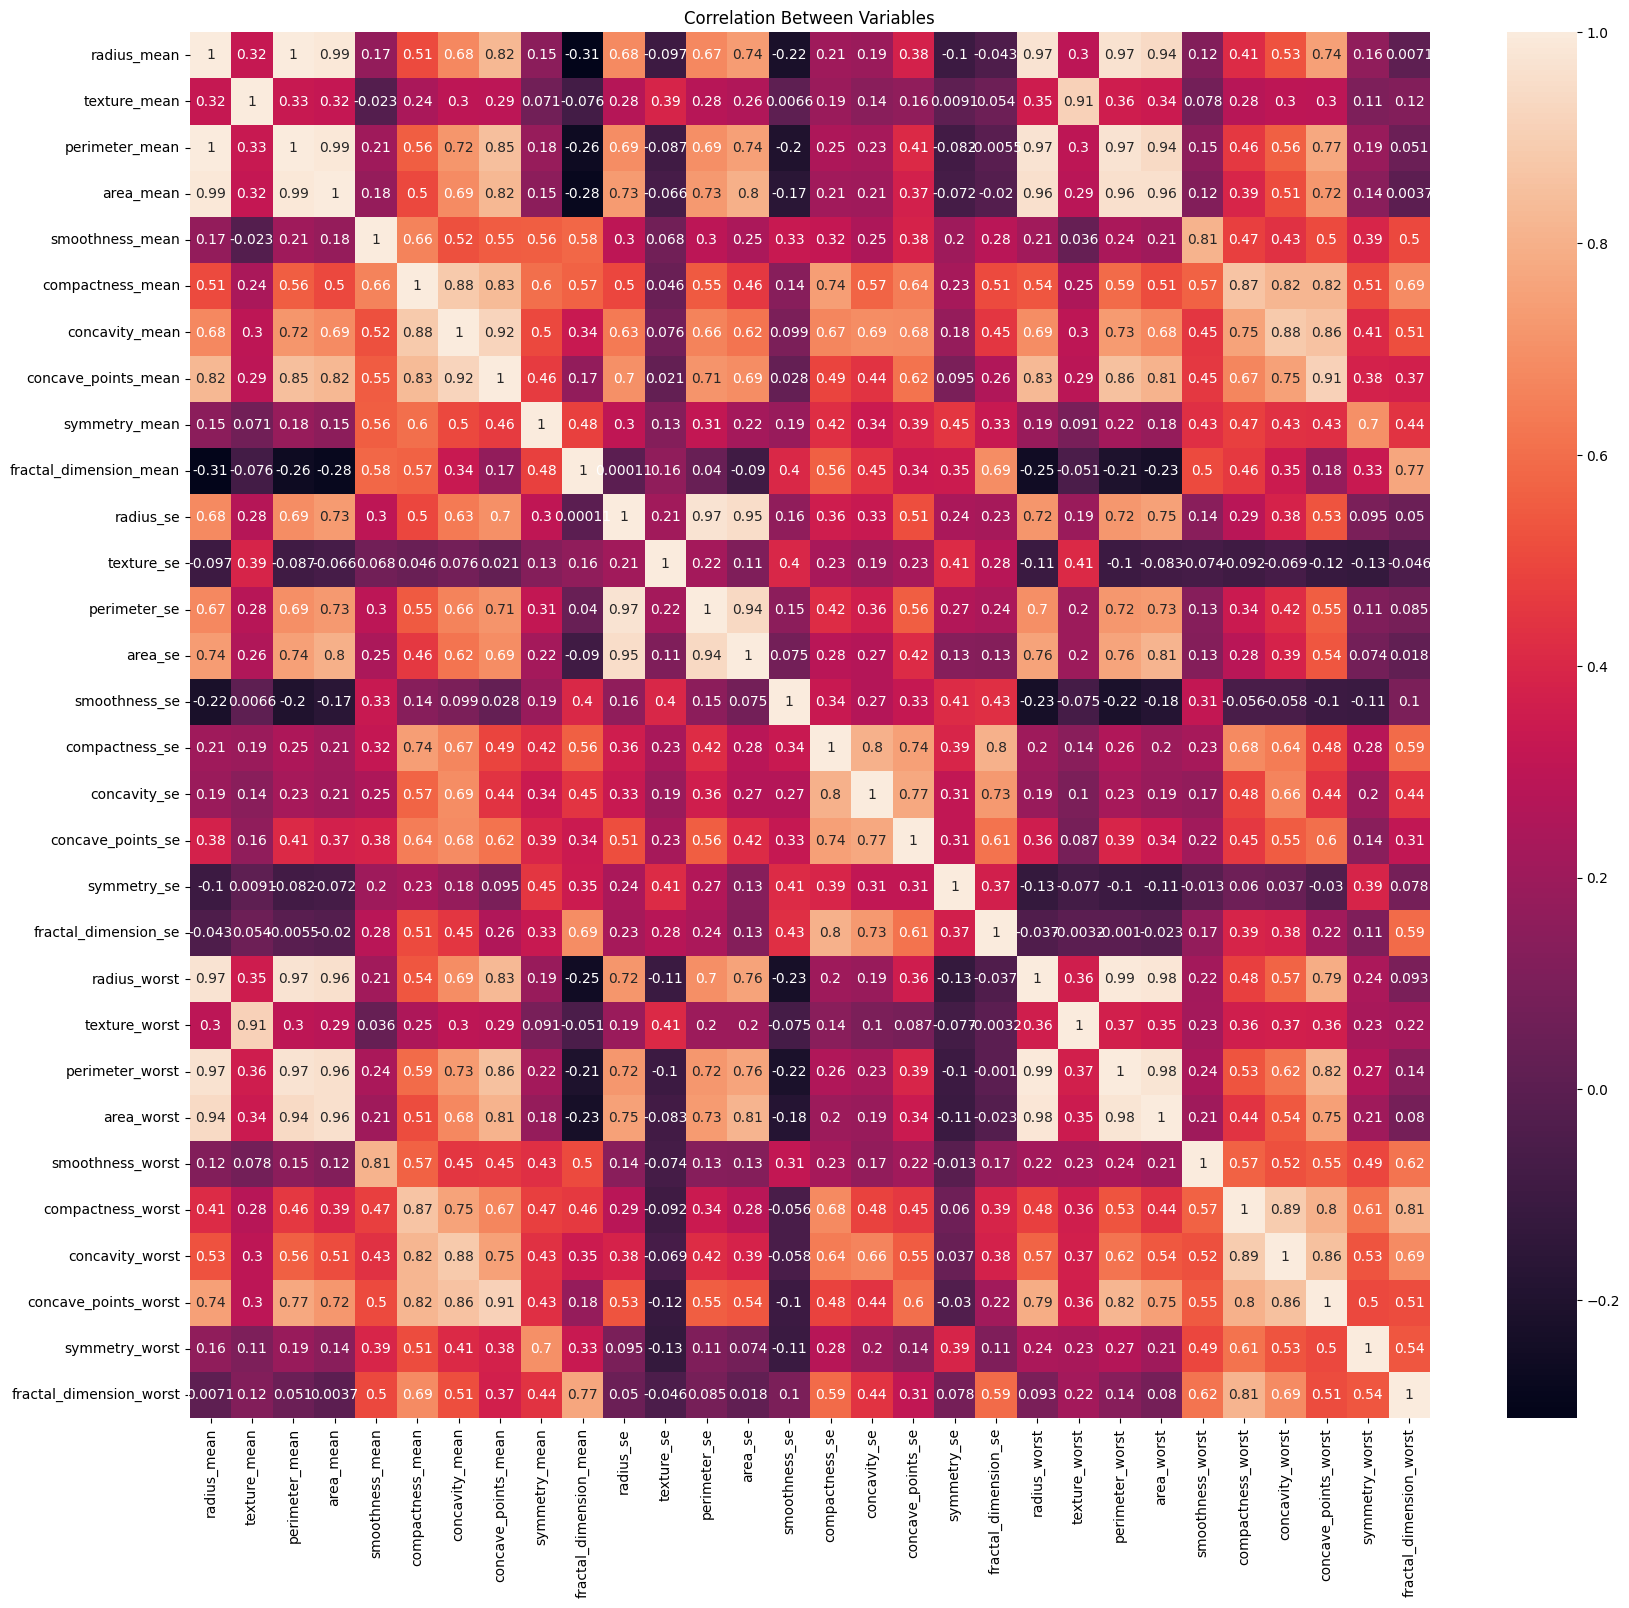

In [ ]:
df_numeric = df.select_dtypes(include=[np.number])  # Keep only numeric columns

plt.figure(figsize=(20,18))
plt.title('Correlation Between Variables')
sns.heatmap(data=df_numeric.corr(), annot=True)

<Axes: xlabel='diagnosis', ylabel='count'>

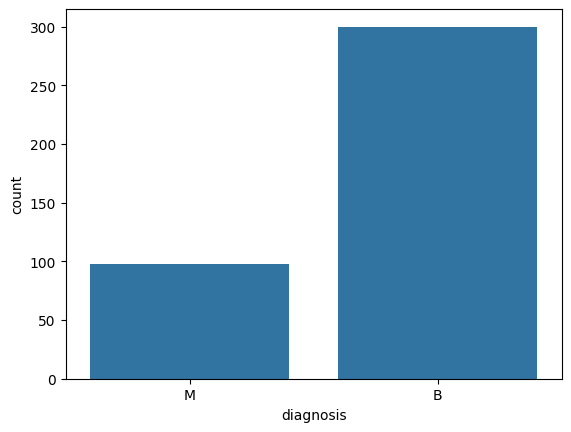

In [ ]:
sns.countplot(x='diagnosis', data=df_cleaned)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cleaned['diagnosis'] = le.fit_transform(df_cleaned['diagnosis'])

In [ ]:
df_cleaned.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
6,1,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,1,13.71,20.83,90.2,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
10,1,16.02,23.24,102.7,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,...,19.19,33.88,123.8,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452


In [ ]:
x = df_cleaned.drop(columns='diagnosis')
y = df_cleaned.diagnosis

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
(x_train.shape[0]/len(x))*100, (x_test.shape[0]/len(x))*100

(79.89949748743719, 20.100502512562816)

In [ ]:
x_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
299,10.51,23.09,66.85,334.2,0.10150,0.06797,0.024950,0.018750,0.1695,0.06556,...,10.93,24.22,70.10,362.7,0.11430,0.08614,0.041580,0.03125,0.2227,0.06777
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.043040,0.1537,0.06171,...,15.30,33.17,100.20,706.7,0.12410,0.22640,0.132600,0.10480,0.2250,0.08321
64,12.68,23.84,82.69,499.0,0.11220,0.12620,0.112800,0.068730,0.1905,0.06590,...,17.09,33.47,111.80,888.3,0.18510,0.40610,0.402400,0.17160,0.3383,0.10310
311,14.61,15.69,92.68,664.9,0.07618,0.03515,0.014470,0.018770,0.1632,0.05255,...,16.46,21.75,103.70,840.8,0.10110,0.07087,0.047460,0.05813,0.2530,0.05695
149,13.74,17.91,88.12,585.0,0.07944,0.06376,0.028810,0.013290,0.1473,0.05580,...,15.34,22.46,97.19,725.9,0.09711,0.18240,0.156400,0.06019,0.2350,0.07014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,13.40,16.95,85.48,552.4,0.07937,0.05696,0.021810,0.014730,0.1650,0.05701,...,14.73,21.70,93.76,663.5,0.12130,0.16760,0.136400,0.06987,0.2741,0.07582
333,11.25,14.78,71.38,390.0,0.08306,0.04458,0.000974,0.002941,0.1773,0.06081,...,12.76,22.06,82.08,492.7,0.11660,0.09794,0.005518,0.01667,0.2815,0.07418
519,12.75,16.70,82.51,493.8,0.11250,0.11170,0.038800,0.029950,0.2120,0.06623,...,14.45,21.74,93.63,624.1,0.14750,0.19790,0.142300,0.08045,0.3071,0.08557
271,11.29,13.04,72.23,388.0,0.09834,0.07608,0.032650,0.027550,0.1769,0.06270,...,12.32,16.18,78.27,457.5,0.13580,0.15070,0.127500,0.08750,0.2733,0.08022


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
print(confusion_matrix(y_test, y_pred_knn))
print(accuracy_score(y_test, y_pred_knn))
print(recall_score(y_test, y_pred_knn))
print(precision_score(y_test, y_pred_knn))

[[53  2]
 [ 5 20]]
0.9125
0.8
0.9090909090909091


<Axes: >

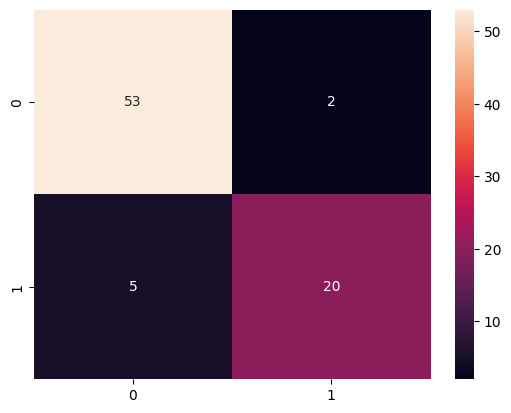

In [ ]:
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
print(confusion_matrix(y_test, y_pred_svm))
print(accuracy_score(y_test, y_pred_svm))
print(recall_score(y_test, y_pred_svm))
print(precision_score(y_test, y_pred_svm))

[[55  0]
 [ 6 19]]
0.925
0.76
1.0


<Axes: >

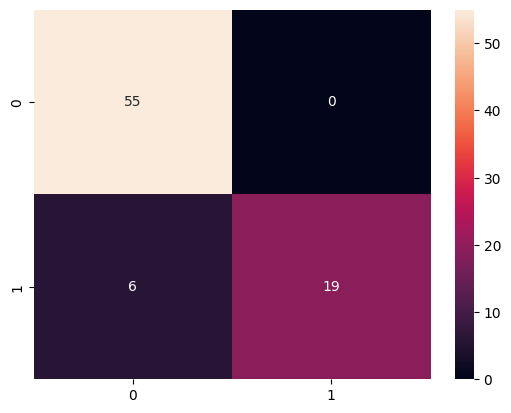

In [ ]:
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
print(confusion_matrix(y_test, y_pred_dt))
print(accuracy_score(y_test, y_pred_dt))
print(recall_score(y_test, y_pred_dt))
print(precision_score(y_test, y_pred_dt))

[[54  1]
 [ 4 21]]
0.9375
0.84
0.9545454545454546


<Axes: >

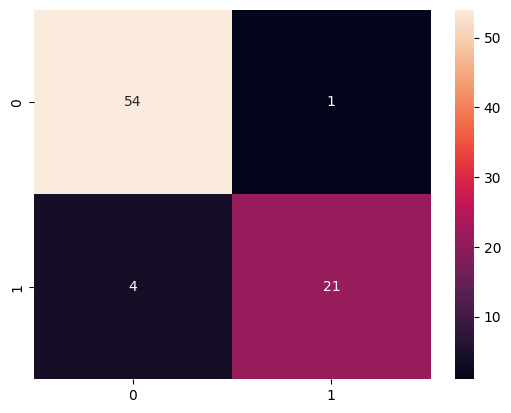

In [ ]:
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d')